In [ ]:
#download dataset
#i got problem on downloading file, so i download it from url passively.
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline
#load dataset
df = pd.read_csv('teleCust1000t.csv')
df['income'] = df['income'].astype('int')
df['retire'] = df['retire'].astype('int')

#convert dataset to dataframe
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X = preprocessing.StandardScaler().fit(X).transform(X)
y = df['custcat'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [24]:
yhat = clf.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.43      0.57      0.49        51
           2       0.45      0.23      0.30        44
           3       0.34      0.39      0.36        54
           4       0.37      0.35      0.36        51

    accuracy                           0.39       200
   macro avg       0.40      0.38      0.38       200
weighted avg       0.40      0.39      0.38       200

Confusion matrix, without normalization
[[10 15]
 [ 7 18]]


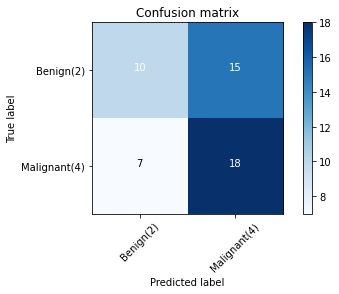

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

# i use average parameter 'micro' to avoid error
from sklearn.metrics import jaccard_score
jaccard_index = jaccard_score(y_test, yhat,pos_label=2,average='micro')

C:\Users\CKIRUser\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [29]:
print("Jaccard index : ",jaccard_index)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))

Jaccard index :  0.2422360248447205
Avg F1-score: 0.3816
